In [78]:
import os
import email
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('C:/Users/benso/Desktop/Projects/UsableAI/Project/cleaned_enron.csv')
print(df['X-To'])

0         John J Lavorato <John J Lavorato/ENRON@enronXg...
1                                          Leah Van Arsdall
2                                                Greg Piper
3                                                Greg Piper
4                                            Joyce Teixeira
                                ...                        
489231    Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...
489232    Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...
489233    Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...
489234    Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN...
489235                   'Livia_Zufferli@Monitor.com@ENRON'
Name: X-To, Length: 489236, dtype: object


In [80]:
#Task 1: 
#split into train, valid and test. Train a model which predicts the sender email id.


#start off with 2 classes, move up from there.
#2 classes = 2 most frequent email senders
df.rename(columns={'X-From': 'From', 'X-To': 'To'}, inplace=True)

class0,class1 = list(df['From'].value_counts().index)[:2]
print(class0)
print(class1)


Kay Mann
Vince J Kaminski


In [ ]:
#one more data cleaning thing.


In [81]:
n_per_class = 1280
messages_0 = df.query('From==@class0')['body'].sample(frac=1)[:n_per_class].values
messages_1 = df.query('From==@class1')['body'].sample(frac=1)[:n_per_class].values

In [82]:
max_features = 2048
embed_dim = 256
maxlen = 256

from tensorflow.keras.preprocessing.text import Tokenizer

messages_all = messages_0+messages_1
np.random.shuffle(messages_all)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(messages_all)
word_index = tokenizer.word_index # This dictionary translates each word to its index (corresponding number)

In [83]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Transform messages into sequences of numbers corresponding to its particular words
seqs_0 = tokenizer.texts_to_sequences(messages_0)
seqs_1 = tokenizer.texts_to_sequences(messages_1)

# Pad sequences, i.e. make them exactly 256 tokens long (as described above)
seqs_0 = pad_sequences(seqs_0, maxlen=maxlen)
seqs_1 = pad_sequences(seqs_1, maxlen=maxlen)

# Concatenate the sequences
seqs_all = np.concatenate([seqs_0, seqs_1], axis=0)

# Create and concatenate the labels
labels_0 = np.zeros(shape=(seqs_0.shape[0]))
labels_1 = np.ones(shape=(seqs_1.shape[0]))
labels_all = np.concatenate([labels_0, labels_1], axis=0)

In [84]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(seqs_all,labels_all,stratify=labels_all)

In [85]:
#logistic regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.596875
C:\Users\benso\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [110]:
from tensorflow.keras import models, layers, optimizers, losses, metrics, utils, applications, callbacks

from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Dense(10, input_dim=256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,581
Trainable params: 2,581
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(X_train, y_train, epochs=100, verbose=False,validation_data=(X_test, y_test), batch_size=10)

In [112]:
from keras.backend import clear_session
clear_session()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5901
Testing Accuracy:  0.5594


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


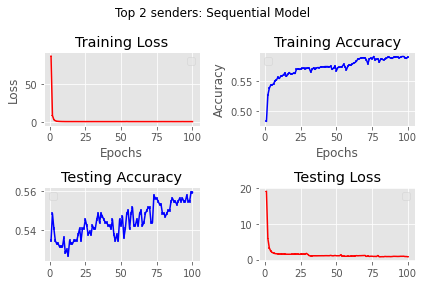

In [113]:
import math
train_loss = history.history['loss']

train_acc = history.history['accuracy']
test_acc = history.history["val_accuracy"]
test_loss = history.history["val_loss"]

fig, ax = plt.subplots(2,2)
#ax[0,0].plot(np.arange(1,11), train_loss, 'r', label='Training loss',xerr = 
#np.std(train_loss))
ax[0,0].errorbar(np.arange(1,101), train_loss ,yerr = np.std(train_loss)/math.sqrt(len(train_loss)),color='r')
ax[0,0].set_title("Training Loss")
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')
ax[0,0].legend()
ax[0,1].set_title("Training Accuracy")
ax[0,1].errorbar(np.arange(1,101), train_acc,yerr = np.std(train_acc)/math.sqrt(len(train_acc)),color='b')
#ax[0,1].plot(np.arange(1,11), train_acc, 'b', label='Training accuracy')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend()
ax[1,0].errorbar(np.arange(1,101), test_acc ,yerr = np.std(test_acc)/math.sqrt(len(test_acc)),color='b')
ax[1,0].set_title("Testing Accuracy")
#ax[1,0].plot(test_acc, 'r', label='testing accuracy')
ax[1,0].legend()
ax[1,1].errorbar(np.arange(1,101), test_loss ,yerr = np.std(test_loss)/math.sqrt(len(test_loss)),color='r')
ax[1,1].set_title("Testing Loss")
#ax[1,1].plot(test_loss, 'b', label='testing loss')
ax[1,1].legend()
plt.suptitle('Top 2 senders: Sequential Model')
plt.tight_layout()
plt.savefig("C:/Users/benso/Desktop/Projects/Usable_AI_Code/Project/2class_sequential_model.png")

plt.show()

In [114]:
max_features = 2048
embed_dim = 256
maxlen = 256

from keras.models import Sequential
from keras import layers


model = Sequential()
model.add(layers.Embedding(input_dim=max_features, 
                           output_dim=embed_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 256)          524288    
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                655370    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,179,669
Trainable params: 1,179,669
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9812


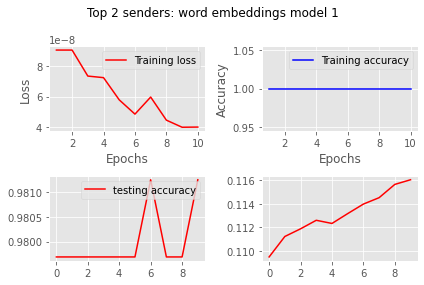

In [68]:
train_loss = history.history['loss']

train_acc = history.history['accuracy']
test_acc = history.history["val_accuracy"]
test_loss = history.history["val_loss"]

fig, ax = plt.subplots(2,2)
ax[0,0].plot(np.arange(1,11), train_loss, 'r', label='Training loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')
ax[0,0].legend()
ax[0,1].plot(np.arange(1,11), train_acc, 'b', label='Training accuracy')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend()
ax[1,0].plot(test_acc, 'r', label='testing accuracy')
ax[1,0].legend()
ax[1,1].plot(test_loss, 'b', label='testing loss')
ax[1,1].legend()
plt.suptitle('Top 2 senders: word embeddings model 1')
plt.tight_layout()
plt.savefig("C:/Users/benso/Desktop/Projects/UsableAI/Project/2class_model_nonembedding.png")

plt.show()


In [70]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(input_dim=max_features, 
                           output_dim=embed_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 256, 256)          524288    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 526,869
Trainable params: 526,869
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9937


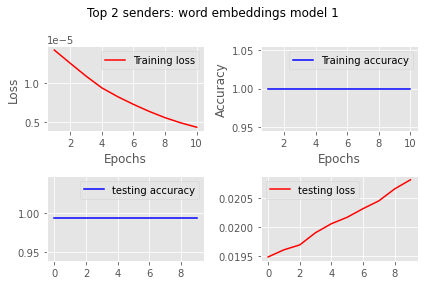

In [75]:
train_loss = history.history['loss']

train_acc = history.history['accuracy']
test_acc = history.history["val_accuracy"]
test_loss = history.history["val_loss"]

fig, ax = plt.subplots(2,2)
ax[0,0].plot(np.arange(1,11), train_loss, 'r', label='Training loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')
ax[0,0].legend()
ax[0,1].plot(np.arange(1,11), train_acc, 'b', label='Training accuracy')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend()
ax[1,0].plot(test_acc, 'b', label='testing accuracy')
ax[1,0].legend()
ax[1,1].plot(test_loss, 'r', label='testing loss')
ax[1,1].legend()
plt.suptitle('Top 2 senders: word embeddings model 1')
plt.tight_layout()
plt.savefig("C:/Users/benso/Desktop/Projects/UsableAI/Project/2class_model_embedding1.png")

plt.show()

In [76]:
from tensorflow.keras import models, layers, optimizers, losses, metrics, utils, applications, callbacks


model = models.Sequential(layers=[
    layers.Embedding(input_dim=max_features, output_dim=embed_dim, input_length=maxlen),
    layers.Bidirectional(layers.GRU(32, activation='relu', return_sequences=True, dropout=.1, recurrent_dropout=.1)),
    layers.Bidirectional(layers.GRU(32, activation='relu', return_sequences=False, dropout=.1, recurrent_dropout=.1)),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(.2),
    layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(.1),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 256, 256)          524288    
_________________________________________________________________
bidirectional (Bidirectional (None, 256, 64)           55680     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [77]:
#import h5py
from keras.models import load_model



model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

EPOCHS = 5

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    validation_data=(X_test, y_test),
    batch_size=64,
    shuffle = True,
    verbose = 1
)

model.save('last_model.h5') # Save the final model

Epoch 1/5
30/30 [==============================] - 39s 1s/step - loss: 1.6706 - acc: 0.6412
Epoch 2/5
 5/30 [====>.........................] - ETA: 32s - loss: 1.1338 - acc: 0.8908

KeyboardInterrupt: 

In [ ]:
train_loss = history.history['loss']

train_acc = history.history['accuracy']
test_acc = history.history["val_accuracy"]
test_loss = history.history["val_loss"]

fig, ax = plt.subplots(2,2)
ax[0,0].plot(np.arange(1,11), train_loss, 'r', label='Training loss')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Loss')
ax[0,0].legend()
ax[0,1].plot(np.arange(1,11), train_acc, 'b', label='Training accuracy')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend()
ax[1,0].plot(test_acc, 'b', label='testing accuracy')
ax[1,0].legend()
ax[1,1].plot(test_loss, 'r', label='testing loss')
ax[1,1].legend()
plt.suptitle('Top 2 senders: word embeddings model 1')
plt.tight_layout()
plt.savefig("C:/Users/benso/Desktop/Projects/UsableAI/Project/2class_model_embedding1.png")

plt.show()

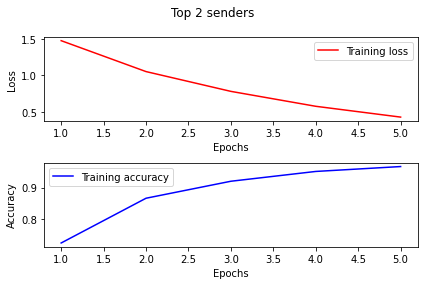

In [61]:
#The first epoch already had an accuracy of 0.93


train_loss = history.history['loss']

train_acc = history.history['acc']

fig, ax = plt.subplots(2)
ax[0].plot(np.arange(1,EPOCHS+1), train_loss, 'r', label='Training loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(np.arange(1,EPOCHS+1), train_acc, 'b', label='Training accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.suptitle('Top 2 senders')
plt.tight_layout()
plt.savefig("C:/Users/benso/Desktop/Projects/UsableAI/Project/2class_model.png")

plt.show()



In [29]:
#lets see predictions
preds = model.predict(X_test)
preds = preds.reshape(1,-1)
npreds = preds.tolist()
newpreds = [item for sublist in npreds for item in sublist]

In [67]:
######################################################################################################
#Let's do this for the top 20 senders, see if the accuracy is still okay

nclass0,nclass1,nclass2,nclass3,nclass4,nclass5,nclass6,nclass7,nclass8,nclass9,nclass10,nclass11,nclass12,nclass13,nclass14,nclass15,nclass16,nclass17,nclass18,nclass19 = list(df['From'].value_counts().index)[:20]
print(nclass0)
print(nclass1)
print(nclass2)
print(nclass3)
print(nclass4)
print(nclass5)
print(nclass6)
print(nclass7)
print(nclass9)
print(nclass10)

Kay Mann
Vince J Kaminski
Jeff Dasovich
Enron Announcements
Tana Jones
Sara Shackleton
Chris Germany
Steven J Kean
Kate Symes
Eric Bass


In [68]:
n_per_class_20 = 1280
n_messages_0 = df.query('From==@nclass0')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_1 = df.query('From==@nclass1')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_2 = df.query('From==@nclass2')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_3 = df.query('From==@nclass3')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_4 = df.query('From==@nclass4')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_5 = df.query('From==@nclass5')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_6 = df.query('From==@nclass6')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_7 = df.query('From==@nclass7')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_8 = df.query('From==@nclass8')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_9 = df.query('From==@nclass9')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_10 = df.query('From==@nclass10')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_11 = df.query('From==@nclass11')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_12 = df.query('From==@nclass12')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_13 = df.query('From==@nclass13')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_14 = df.query('From==@nclass14')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_15 = df.query('From==@nclass15')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_16 = df.query('From==@nclass16')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_17 = df.query('From==@nclass17')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_18 = df.query('From==@nclass18')['body'].sample(frac=1)[:n_per_class_20].values
n_messages_19 = df.query('From==@nclass19')['body'].sample(frac=1)[:n_per_class_20].values

In [81]:
max_features = 512
embed_dim = 128
maxlen = 200

from tensorflow.keras.preprocessing.text import Tokenizer

messages_all = n_messages_0+n_messages_1+n_messages_2+n_messages_3+n_messages_4+n_messages_5+n_messages_6+n_messages_7+n_messages_8+n_messages_9+n_messages_10+n_messages_11+n_messages_12+n_messages_13+n_messages_14+n_messages_15+n_messages_16+n_messages_17+n_messages_18+n_messages_19
np.random.shuffle(messages_all)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(messages_all)
word_index = tokenizer.word_index # This dictionary translates each word to its index (corresponding number)

In [82]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Transform messages into sequences of numbers corresponding to its particular words
seqs_0 = tokenizer.texts_to_sequences(n_messages_0)
seqs_1 = tokenizer.texts_to_sequences(n_messages_1)
seqs_2 = tokenizer.texts_to_sequences(n_messages_2)
seqs_3 = tokenizer.texts_to_sequences(n_messages_3)
seqs_4 = tokenizer.texts_to_sequences(n_messages_4)
seqs_5 = tokenizer.texts_to_sequences(n_messages_5)
seqs_6 = tokenizer.texts_to_sequences(n_messages_6)
seqs_7 = tokenizer.texts_to_sequences(n_messages_7)
seqs_8 = tokenizer.texts_to_sequences(n_messages_8)
seqs_9 = tokenizer.texts_to_sequences(n_messages_9)
seqs_10 = tokenizer.texts_to_sequences(n_messages_10)
seqs_11 = tokenizer.texts_to_sequences(n_messages_11)
seqs_12 = tokenizer.texts_to_sequences(n_messages_12)
seqs_13 = tokenizer.texts_to_sequences(n_messages_13)
seqs_14 = tokenizer.texts_to_sequences(n_messages_14)
seqs_15 = tokenizer.texts_to_sequences(n_messages_15)
seqs_16 = tokenizer.texts_to_sequences(n_messages_16)
seqs_17 = tokenizer.texts_to_sequences(n_messages_17)
seqs_18 = tokenizer.texts_to_sequences(n_messages_18)
seqs_19 = tokenizer.texts_to_sequences(n_messages_19)



# Pad sequences, i.e. make them exactly 256 tokens long (as described above)
seqs_0 = pad_sequences(seqs_0, maxlen=maxlen)
seqs_1 = pad_sequences(seqs_1, maxlen=maxlen)
seqs_2 = pad_sequences(seqs_2, maxlen=maxlen)
seqs_3 = pad_sequences(seqs_3, maxlen=maxlen)
seqs_4 = pad_sequences(seqs_4, maxlen=maxlen)
seqs_5 = pad_sequences(seqs_5, maxlen=maxlen)
seqs_6 = pad_sequences(seqs_6, maxlen=maxlen)
seqs_7 = pad_sequences(seqs_7, maxlen=maxlen)
seqs_8 = pad_sequences(seqs_8, maxlen=maxlen)
seqs_9 = pad_sequences(seqs_9, maxlen=maxlen)
seqs_10 = pad_sequences(seqs_10, maxlen=maxlen)
seqs_11 = pad_sequences(seqs_11, maxlen=maxlen)
seqs_12 = pad_sequences(seqs_12, maxlen=maxlen)
seqs_13 = pad_sequences(seqs_13, maxlen=maxlen)
seqs_14 = pad_sequences(seqs_14, maxlen=maxlen)
seqs_15 = pad_sequences(seqs_15, maxlen=maxlen)
seqs_16 = pad_sequences(seqs_16, maxlen=maxlen)
seqs_17 = pad_sequences(seqs_17, maxlen=maxlen)
seqs_18 = pad_sequences(seqs_18, maxlen=maxlen)
seqs_19 = pad_sequences(seqs_19, maxlen=maxlen)



# Concatenate the sequences
seqs_all = np.concatenate([seqs_0, seqs_1,seqs_2,seqs_3,seqs_4,seqs_5,seqs_6,seqs_7,seqs_8,seqs_9,seqs_10,seqs_11,seqs_12,seqs_13,seqs_14,seqs_15,seqs_16,seqs_17,seqs_18,seqs_19], axis=0)

# Create and concatenate the labels
labels_0 = np.zeros(shape=(seqs_0.shape[0]))
labels_1 = np.ones(shape=(seqs_1.shape[0]))
labels_2 = np.full((seqs_2.shape[0]), 2)
labels_3 = np.full((seqs_3.shape[0]), 3)
labels_4 = np.full((seqs_4.shape[0]), 4)
labels_5 = np.full((seqs_5.shape[0]), 5)
labels_6 = np.full((seqs_6.shape[0]), 6)
labels_7 = np.full((seqs_7.shape[0]), 7)
labels_8 = np.full((seqs_8.shape[0]), 8)
labels_9 = np.full((seqs_9.shape[0]), 9)
labels_10 = np.full((seqs_10.shape[0]), 10)
labels_11 = np.full((seqs_11.shape[0]), 11)
labels_12 = np.full((seqs_12.shape[0]), 12)
labels_13 = np.full((seqs_13.shape[0]), 13)
labels_14 = np.full((seqs_14.shape[0]), 14)
labels_15 = np.full((seqs_15.shape[0]), 15)
labels_16 = np.full((seqs_16.shape[0]), 16)
labels_17 = np.full((seqs_17.shape[0]), 17)
labels_18 = np.full((seqs_18.shape[0]), 18)
labels_19 = np.full((seqs_19.shape[0]), 19)

labels_all = np.concatenate([labels_0, labels_1,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,labels_8,labels_9,labels_10,labels_11,labels_12,labels_13,labels_14,labels_15,labels_16,labels_17,labels_18,labels_19], axis=0)

#labels_all = np.concatenate([labels_0, labels_1], axis=0)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(seqs_all,labels_all,stratify=labels_all)

In [87]:
model = models.Sequential(layers=[
    layers.Embedding(input_dim=max_features, output_dim=embed_dim, input_length=maxlen),
    layers.Bidirectional(layers.GRU(32, activation='relu', return_sequences=True, dropout=.1, recurrent_dropout=.1)),
    layers.Bidirectional(layers.GRU(32, activation='relu', return_sequences=False, dropout=.1, recurrent_dropout=.1)),
    layers.Dense(64, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(.2),
    layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(.1),
    layers.Dense(20, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 128)          65536     
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 200, 64)           31104     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 64)                18816     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)               

In [89]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

EPOCHS = 5

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS, batch_size=64,
    shuffle = True,
    verbose = 1
)

model.save('last_model_10classes.h5') # Save the final model

Epoch 1/5
300/300 [==============================] - 144s 465ms/step - loss: 3.2626 - acc: 0.2590
Epoch 2/5
300/300 [==============================] - 172s 574ms/step - loss: 2.1117 - acc: 0.4320
Epoch 3/5
300/300 [==============================] - 175s 583ms/step - loss: 1.5819 - acc: 0.5657
Epoch 4/5
300/300 [==============================] - 165s 551ms/step - loss: 0.9242 - acc: 0.7757
Epoch 5/5
300/300 [==============================] - 167s 555ms/step - loss: 0.7179 - acc: 0.8247


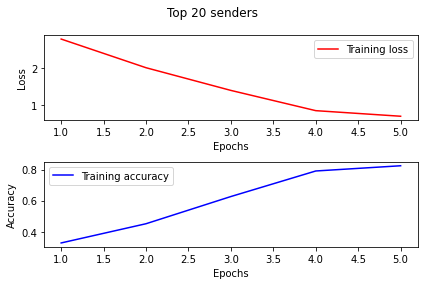

In [90]:
train_loss = history.history['loss']

train_acc = history.history['acc']

fig, ax = plt.subplots(2)
ax[0].plot(np.arange(1,EPOCHS+1), train_loss, 'r', label='Training loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(np.arange(1,EPOCHS+1), train_acc, 'b', label='Training accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.suptitle('Top 20 senders')
plt.tight_layout()
plt.savefig("C:/Users/benso/Desktop/Projects/UsableAI/Project/20class_model.png")

plt.show()